# Customer life time value project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the test and train data 

In [2]:
data_train = pd.read_csv("C:/Users/USER/Downloads/train_BRCpofr.csv")
data_test = pd.read_csv("C:/Users/USER/Downloads/test_koRSKBP.csv")

In [3]:
data_train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
data_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
### checking rows in the data

In [6]:
data_train.shape

(89392, 12)

In [7]:
data_test.shape

(59595, 11)

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


It can be observed that claim_amount has missing values

# checking duplicated values

In [10]:
data_train[data_train.duplicated(keep = False)]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv


In [11]:
data_test[data_test.duplicated(keep = False)]

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy


In [12]:
data_train.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [13]:
data_test.describe()

,id,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000,59595.000000
mean,119190.000000,0.576928,4.620304,4368.504321
std,17203.738983,0.494051,2.282511,3288.132408
min,89393.000000,0.000000,0.000000,0.000000
25%,104291.500000,0.000000,3.000000,2398.000000
50%,119190.000000,1.000000,5.000000,4106.000000
75%,134088.500000,1.000000,6.000000,6104.000000
max,148987.000000,1.000000,8.000000,32534.000000


In [14]:
#CHECKING NULL VALUES
data_train.isnull().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

# Checking outliers 

<AxesSubplot:>

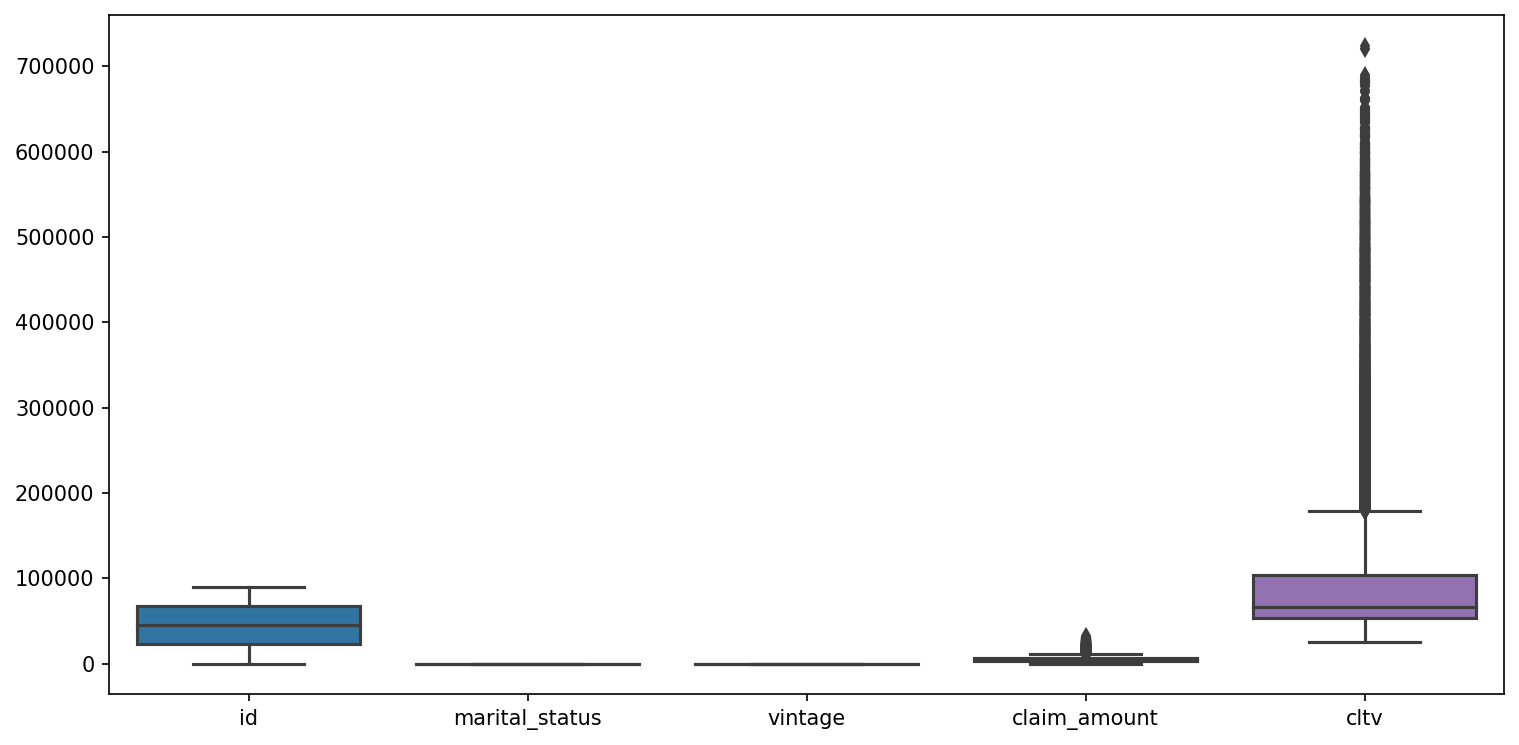

In [15]:
# Box plot for checking the outliers 
plt.figure(figsize=(12,6),dpi=150)
sns.boxplot(data=data_train[['id','marital_status','vintage','claim_amount','cltv']])

<AxesSubplot:>

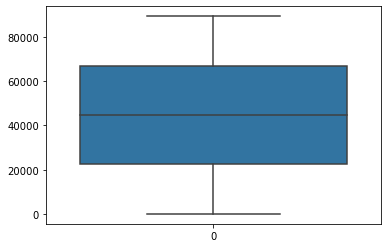

In [16]:
sns.boxplot(data=data_train['id'])

In [17]:
#z-score
print("Mean value of claim_amount",data_train.mean())
print("Std value of claim_amount",data_train.std())
print("Min value of claim_amount",data_train.min())
print("Max value of claim_amount",data_train.max())

C:\Users\USER\AppData\Local\Temp\ipykernel_1376\486149487.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Mean value of claim_amount",data_train.mean())
C:\Users\USER\AppData\Local\Temp\ipykernel_1376\486149487.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Std value of claim_amount",data_train.std())


Mean value of claim_amount id                44696.500000
marital_status        0.575488
vintage               4.595669
claim_amount       4351.502416
cltv              97952.828978
dtype: float64
Std value of claim_amount id                25805.391969
marital_status        0.494272
vintage               2.290446
claim_amount       3262.359775
cltv              90613.814793
dtype: float64
Min value of claim_amount id                       1
gender              Female
area                 Rural
qualification     Bachelor
income               2L-5L
marital_status           0
vintage                  0
claim_amount             0
num_policies             1
policy                   A
type_of_policy        Gold
cltv                 24828
dtype: object
Max value of claim_amount id                        89392
gender                     Male
area                      Urban
qualification            Others
income            More than 10L
marital_status                1
vintage                  

In [18]:
Highest_allowed = data_train.mean()+3*data_train.std()
Lowest_allowed = data_train.mean()-3*data_train.std()

C:\Users\USER\AppData\Local\Temp\ipykernel_1376\558409997.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Highest_allowed = data_train.mean()+3*data_train.std()
C:\Users\USER\AppData\Local\Temp\ipykernel_1376\558409997.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Lowest_allowed = data_train.mean()-3*data_train.std()


In [19]:
Highest_allowed

id                122112.675907
marital_status         2.058302
vintage               11.467006
claim_amount       14138.581742
cltv              369794.273358
dtype: float64

In [20]:
Lowest_allowed

id                -32719.675907
marital_status        -0.907327
vintage               -2.275669
claim_amount       -5435.576909
cltv             -173888.615402
dtype: float64

In [21]:
#finding outliers
data_train[(data_train>Highest_allowed) | (data_train<Lowest_allowed)].count()

C:\Users\USER\AppData\Local\Temp\ipykernel_1376\2129418412.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_train[(data_train>Highest_allowed) | (data_train<Lowest_allowed)].count()


id                   0
gender               0
area                 0
qualification        0
income               0
marital_status       0
vintage              0
claim_amount      1109
num_policies         0
policy               0
type_of_policy       0
cltv              2700
dtype: int64

claim_amount and cltv has outliers

In [22]:
new_data_train_cap = data_train.copy()

In [23]:
cols = ['id','marital_status','vintage','claim_amount','cltv']

In [24]:
new_data_train_cap[cols]=np.where(
new_data_train_cap[cols]>Highest_allowed,
Highest_allowed,
np.where(
new_data_train_cap[cols]<Lowest_allowed,
Lowest_allowed,
new_data_train_cap[cols]))

In [25]:
new_data_train_cap.shape

(89392, 12)

In [26]:
new_data_train_cap

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1.0,Male,Urban,Bachelor,5L-10L,1.0,5.0,5790.0,More than 1,A,Platinum,64308.000000
1,2.0,Male,Rural,High School,5L-10L,0.0,8.0,5080.0,More than 1,A,Platinum,369794.273358
2,3.0,Male,Urban,Bachelor,5L-10L,1.0,8.0,2599.0,More than 1,A,Platinum,64212.000000
3,4.0,Female,Rural,High School,5L-10L,0.0,7.0,0.0,More than 1,A,Platinum,97920.000000
4,5.0,Male,Urban,High School,More than 10L,1.0,6.0,3508.0,More than 1,A,Gold,59736.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388.0,Male,Rural,High School,More than 10L,0.0,6.0,0.0,More than 1,B,Platinum,95736.000000
89388,89389.0,Male,Urban,Bachelor,5L-10L,1.0,0.0,3897.0,More than 1,A,Platinum,67596.000000
89389,89390.0,Female,Urban,Bachelor,5L-10L,0.0,4.0,3363.0,More than 1,B,Platinum,114120.000000
89390,89391.0,Female,Rural,High School,2L-5L,0.0,8.0,0.0,More than 1,B,Platinum,71772.000000


In [27]:
new_data_train_cap.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4314.197917,95137.779422
std,25805.391969,0.494272,2.290446,3111.155615,79202.839745
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,14138.581742,369794.273358


<AxesSubplot:>

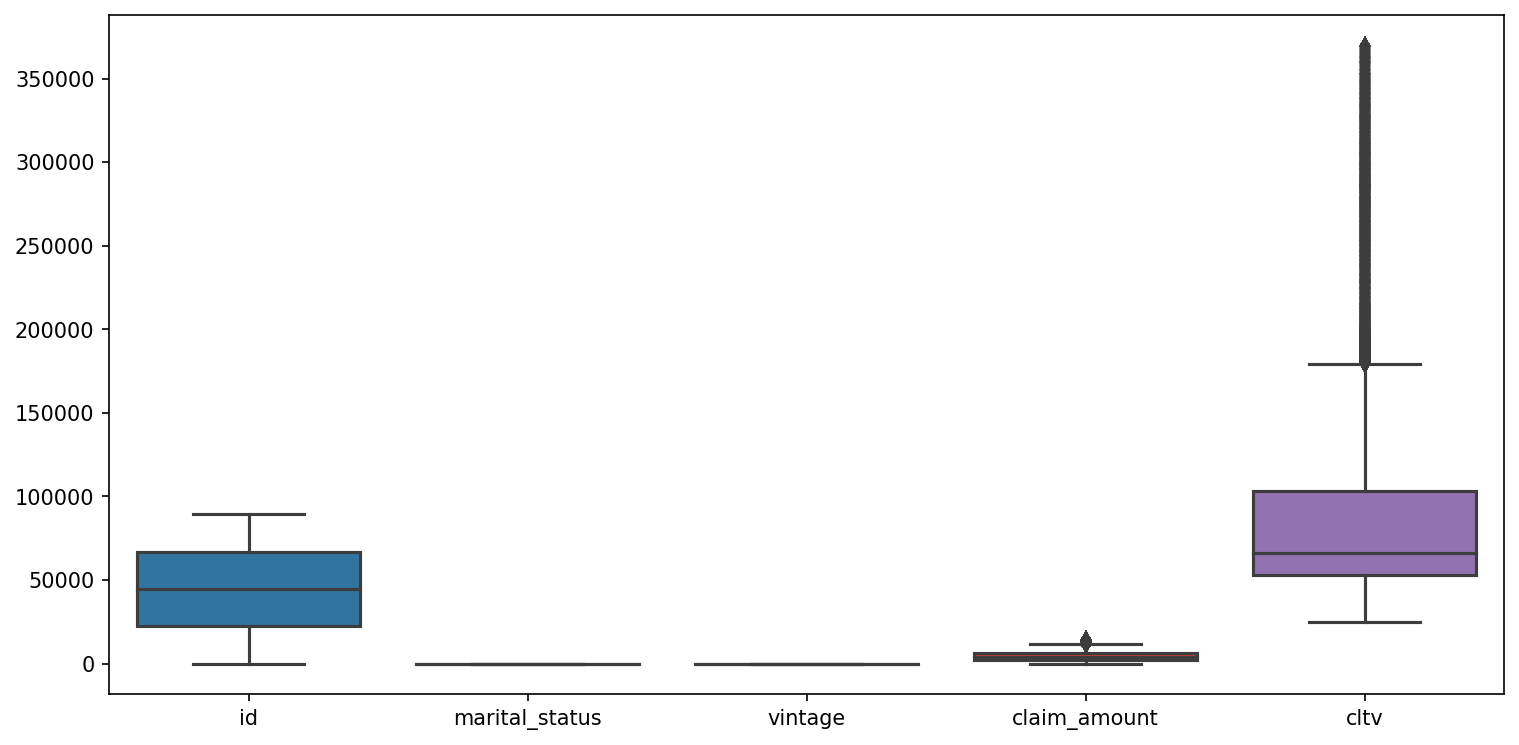

In [28]:
# Box plot for checking the outliers 
plt.figure(figsize=(12,6),dpi=150)
sns.boxplot(data=new_data_train_cap[['id','marital_status','vintage','claim_amount','cltv']])

<AxesSubplot:>

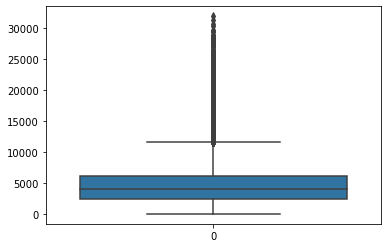

In [29]:
sns.boxplot(data=data_train['claim_amount'])

array([[<AxesSubplot:title={'center':'claim_amount'}>]], dtype=object)

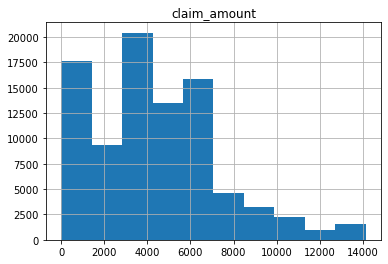

In [30]:
new_data_train_cap.hist('claim_amount')

<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

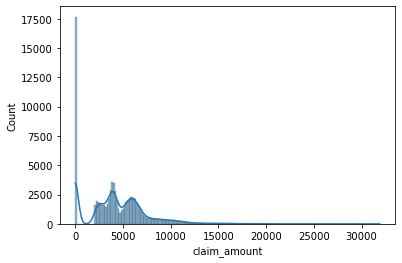

In [31]:
sns.histplot(data=data_train['claim_amount'], kde=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

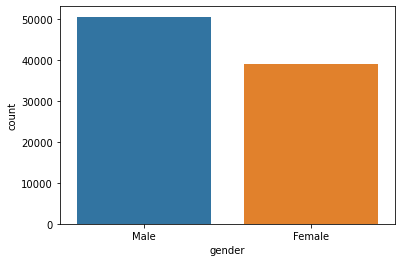

In [32]:
sns.countplot(data=data_train, x='gender')

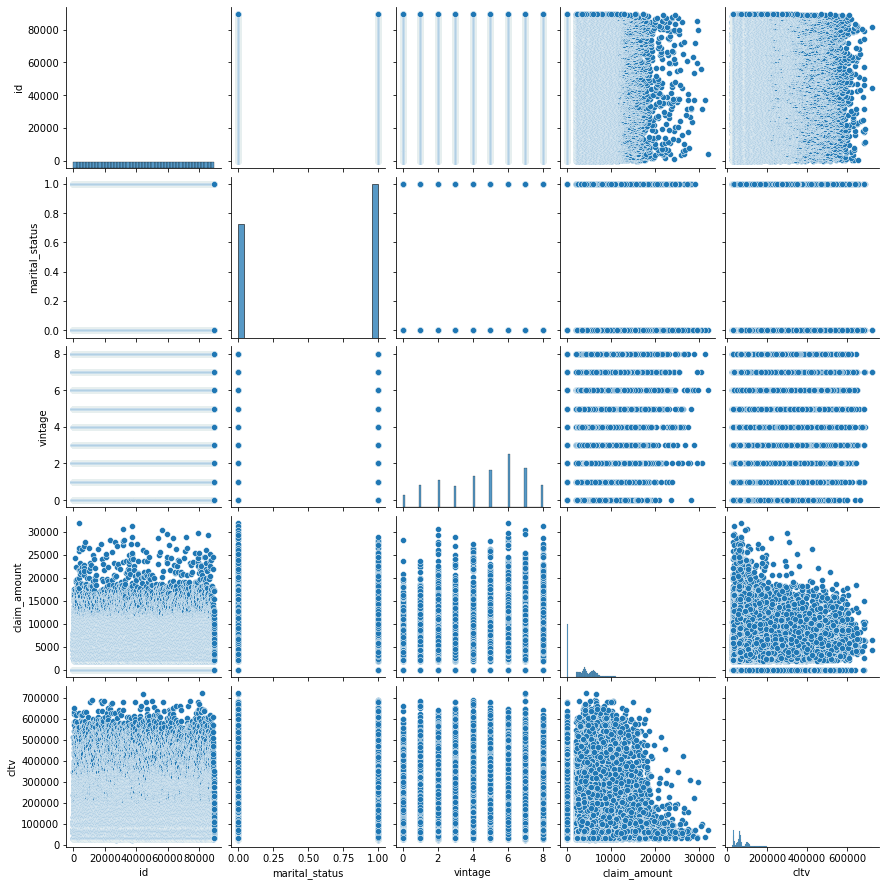

In [33]:
sns.pairplot(data=data_train)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

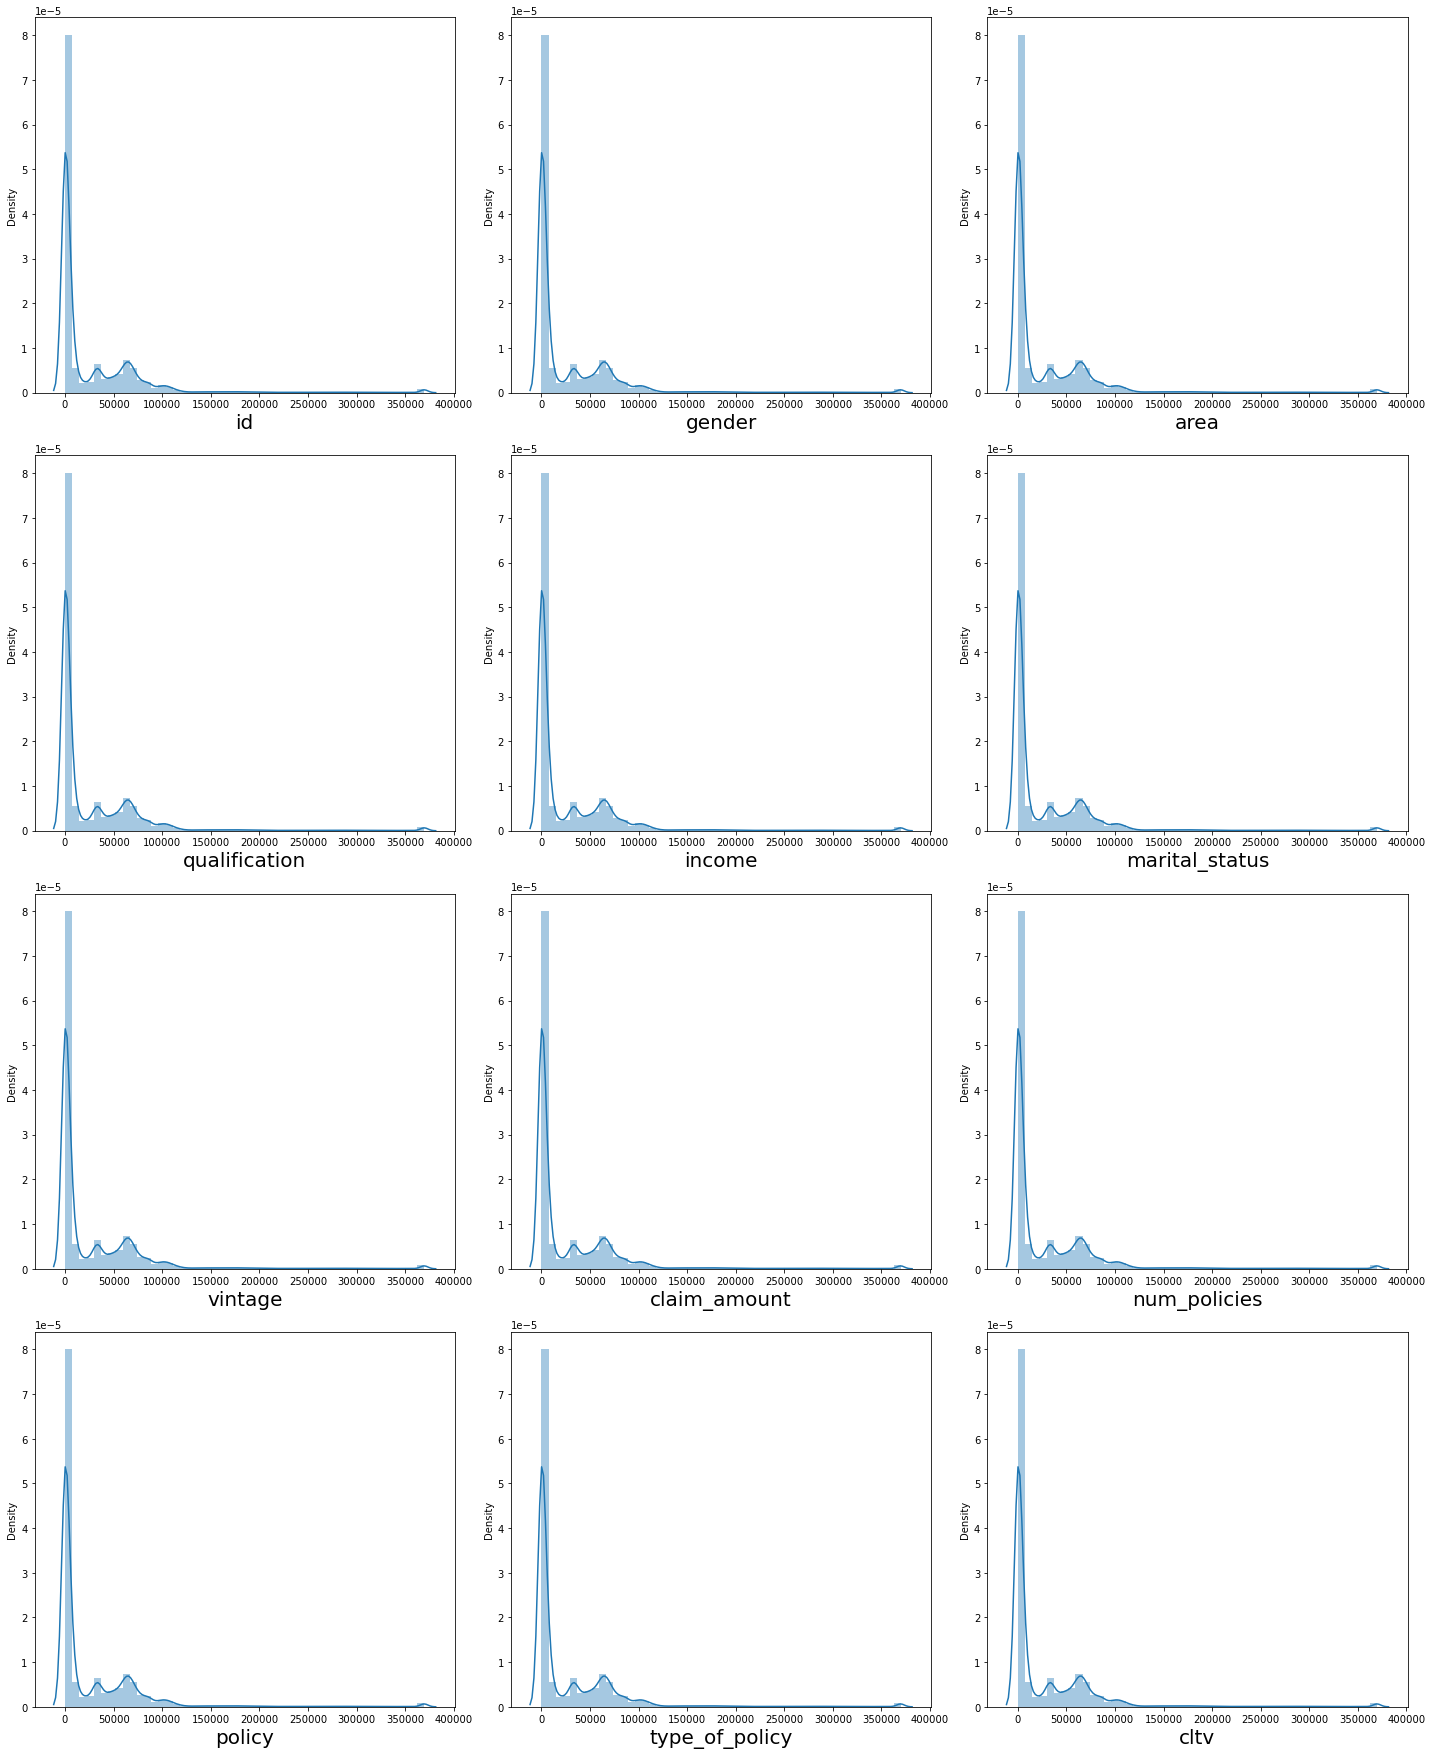

In [34]:
plt.figure(figsize=(20,30), facecolor = 'white')
plotnumber = 1

for column in data_train:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(new_data_train_cap[cols])
        plt.xlabel(column, fontsize = 20)
        
        plotnumber+=1
        plt.tight_layout()

<AxesSubplot:>

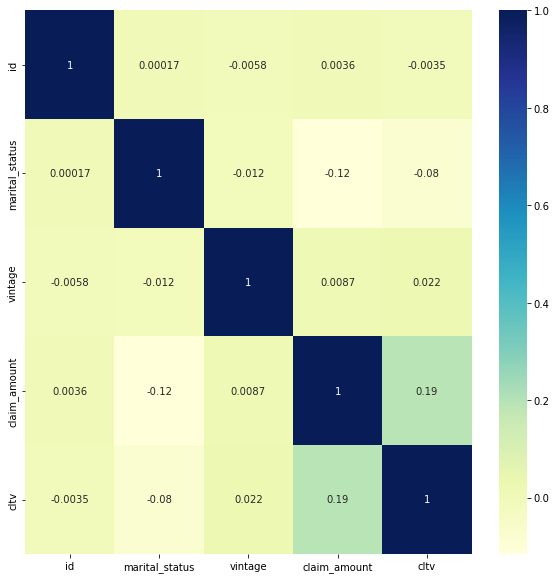

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data_train_cap.corr(), cmap="YlGnBu", annot=True)

In [36]:
new_data_train_cap.corr()

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003594,-0.003468
marital_status,0.000171,1.000000,-0.011686,-0.115600,-0.080482
vintage,-0.005824,-0.011686,1.000000,0.008699,0.022344
claim_amount,0.003594,-0.115600,0.008699,1.000000,0.193171
cltv,-0.003468,-0.080482,0.022344,0.193171,1.000000


# encoding categorical columns 

In [37]:
new_data_train_cap = pd.get_dummies(new_data_train_cap)

In [38]:
new_data_train_cap.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,...,income_<=2L,income_More than 10L,num_policies_1,num_policies_More than 1,policy_A,policy_B,policy_C,type_of_policy_Gold,type_of_policy_Platinum,type_of_policy_Silver
0,1.0,1.0,5.0,5790.0,64308.000000,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
1,2.0,0.0,8.0,5080.0,369794.273358,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,0
2,3.0,1.0,8.0,2599.0,64212.000000,0,1,0,1,1,...,0,0,0,1,1,0,0,0,1,0
3,4.0,0.0,7.0,0.0,97920.000000,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
4,5.0,1.0,6.0,3508.0,59736.000000,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,0


In [39]:
# Computing the correlation with cltv with various columns
new_data_train_cap.corr()['cltv']

id                          -0.003468
marital_status              -0.080482
vintage                      0.022344
claim_amount                 0.193171
cltv                         1.000000
gender_Female                0.003840
gender_Male                 -0.003840
area_Rural                  -0.139010
area_Urban                   0.139010
qualification_Bachelor       0.003944
qualification_High School    0.016043
qualification_Others        -0.049781
income_2L-5L                 0.074847
income_5L-10L               -0.041235
income_<=2L                  0.024217
income_More than 10L        -0.041634
num_policies_1              -0.389438
num_policies_More than 1     0.389438
policy_A                     0.036275
policy_B                    -0.059732
policy_C                     0.032065
type_of_policy_Gold          0.009684
type_of_policy_Platinum      0.023179
type_of_policy_Silver       -0.036882
Name: cltv, dtype: float64

In [40]:
def get_combined_data():
    train = pd.read_csv("C:/Users/USER/Downloads/train_BRCpofr.csv")
    test = pd.read_csv("C:/Users/USER/Downloads/test_koRSKBP.csv")
    targets = train.cltv
    train.drop('cltv', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'id'], inplace=True, axis=1)
    return combined

In [41]:
combined = get_combined_data()
combined.describe()

C:\Users\USER\AppData\Local\Temp\ipykernel_1376\1817997866.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('cltv', 1, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1376\1817997866.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = train.append(test)


,marital_status,vintage,claim_amount
count,148987.000000,148987.000000,148987.000000
mean,0.576064,4.605523,4358.303201
std,0.494182,2.287299,3272.692800
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2402.000000
50%,1.000000,5.000000,4095.000000
75%,1.000000,6.000000,6098.000000
max,1.000000,8.000000,32534.000000


In [42]:
combined.shape

(148987, 10)

In [43]:
combined.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold


# Train Test Split

In [91]:
# Dividing the data dependent and independent variable
#creating X and Y variables

X=new_data_train_cap.iloc[:,0:12]
y=new_data_train_cap['cltv']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X.head()

,id,marital_status,vintage,claim_amount,cltv,gender_Female,gender_Male,area_Rural,area_Urban,qualification_Bachelor,qualification_High School,qualification_Others
0,1.0,1.0,5.0,5790.0,64308.000000,0,1,0,1,1,0,0
1,2.0,0.0,8.0,5080.0,369794.273358,0,1,1,0,0,1,0
2,3.0,1.0,8.0,2599.0,64212.000000,0,1,0,1,1,0,0
3,4.0,0.0,7.0,0.0,97920.000000,1,0,1,0,0,1,0
4,5.0,1.0,6.0,3508.0,59736.000000,0,1,0,1,0,1,0


# XGBoost Regressor 

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [96]:
# Importing XGBoostRegressor model
import xgboost as xgb
from xgboost import XGBRegressor

In [97]:
# Using Grid Search we approcahed these hyper parameters 
model = XGBRegressor(learning_rate=0.2, max_depth= 12, n_estimators= 150)

In [98]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [99]:
preds = model.predict(X_test)

In [100]:
r2_score(y_test, preds)

0.9999998039333018

In [101]:
np.sqrt(mean_squared_error(y_test, preds))

34.7064342122521

# Gradient Boosting Regressor

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gbr = GradientBoostingRegressor()

In [104]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [105]:
prd = gbr.predict(X_test)

In [106]:
r2_score(y_test, prd)

0.9999647887655184

In [107]:
np.sqrt(mean_squared_error(y_test, prd))

465.10253213325643

# working on test data

In [108]:
xgb_model = XGBRegressor(learning_rate=0.2, max_depth= 12, n_estimators= 150)

In [109]:
xgb_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [115]:
data_test = pd.read_csv("C:/Users/USER/Downloads/test_koRSKBP.csv")

In [116]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 non-null  int64 
 1   gender          59595 non-null  object
 2   area            59595 non-null  object
 3   qualification   59595 non-null  object
 4   income          59595 non-null  object
 5   marital_status  59595 non-null  int64 
 6   vintage         59595 non-null  int64 
 7   claim_amount    59595 non-null  int64 
 8   num_policies    59595 non-null  object
 9   policy          59595 non-null  object
 10  type_of_policy  59595 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [117]:
data_test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [118]:
id = data_test['id']

In [119]:
# Dropping ID
data_test = data_test.drop('id', axis=1)

<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

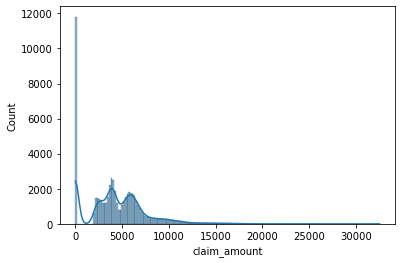

In [120]:
sns.histplot(data=data_test['claim_amount'], kde=True)

In [135]:
data_test = pd.get_dummies(X_test)

In [148]:
cltv = xgb_model.predict(X_test)

In [149]:
cltv

array([106101.57 ,  30860.729,  43099.71 , ...,  33813.21 ,  33514.2  ,
        90283.45 ], dtype=float32)

In [150]:
data_test_final = pd.DataFrame()

In [151]:
data_test_final['id'] = id

In [155]:
data_test_final['cltv'] = pd.Series(cltv)

In [157]:
data_test_final.head()

,id,cltv
0,89393,106101.570312
1,89394,30860.728516
2,89395,43099.710938
3,89396,71465.796875
4,89397,70009.398438


In [159]:
# Saving the file to csv
data_test_final.to_csv('final.csv', index=False)